# $\color{Magenta}{\large{{\underline{Text {\space} Data {\space} Sentiment {\space}Analysis}}}}$

$\fbox{$\color{navy}{\large{Mounting {\space}  Google {\space}Drive}}$}$

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


$\fbox {$\color{navy}{\large{Importing {\space}Required  {\space} Libraries {\space}}}$}$

In [ ]:
import pandas as pd
import re
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

$\fbox {$\color{navy}{\large{Storing {\space} Text {\space} Data {\space} into {\space}DataFrame}}$}$

In [ ]:
#@title Default title text
product_id=[]
userid=[]
profilename=[]
helpnessnumerator=[]
helpnessdenominator=[]
score=[]
time=[]
reviewsummary=[]
reviewtext=[]
for i in file_names:
    with open("/content/tt/txt_reviews/"+i,"r") as f:
       d=f.readlines()
       p=d[0].split(":")
       u=d[1].split(":")
       pr=d[2].split(":")
       he=d[3].split(":")
       hel=d[4].split(":")
       s=d[5].split(":")
       t=d[6].split(":")
       rs=d[7].split(":")
       rt=d[8].split(":")
       product_id.append(p[1])
       userid.append(u[1])
       profilename.append(pr[1])
       helpnessnumerator.append(he[1])
       helpnessdenominator.append(hel[1])
       score.append(s[1])
       time.append(t[1])
       reviewsummary.append(rs[1])
       reviewtext.append(rt[1])
df=pd.DataFrame({"productid":product_id,"userid":userid,"profilename":profilename,"helpnessnumerator":helpnessnumerator
                 ,"helpnessdenominator":helpnessdenominator,"score":score,"time":time,"reviewsummary":reviewsummary,
                 "reviewtext":reviewtext})
df.head()

$\fbox{$\color{navy}{\large{File  {\space} Handling {\space}  {\space}}}$}$

In [ ]:
df.to_csv("/content/drive/MyDrive/Colab Notebooks/text1.csv")

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/text1.csv")
df.head()

,Unnamed: 0,productid,userid,profilename,helpnessnumerator,helpnessdenominator,score,time,reviewsummary,reviewtext
0,0,B000GW68Z8,ARO8G4WT40C88,"Mary M. Bayer ""mimi""",1,1,5,1168473600,Nothing but the best for the Troops!,My mom first sent my husband a box in his car...
1,1,B001CJSW5S,A2U5QVKBYK57OT,Lynn,0,0,4,1322438400,Pineapple Rum Cake,These cakes are moist and flavorful. Not too ...
2,2,B00020HHAO,A5CR6GP49HVEE,Stephanie,1,1,4,1295913600,"Not as rose-flavored as you might think, but ...",I bought this tea thinking it would taste lik...
3,3,B000F9Z1ZK,A132ETQPMHQ585,"Donna's Reviews ""I Love Shopping on Amazon!""",0,1,5,1331596800,Have always loved these...,Have always loved these...Snackwell's Devil's...
4,4,B001GQ3E2I,A1WXFUNDQBAJSH,JP,0,2,5,1324771200,Good stuff,My parents only eat this now because it doesn...


$\fbox{$\color{navy}{\large{Data {\space} Cleaning {\space} {\space}  {\space}}}$}$

In [ ]:
df=df.drop("Unnamed: 0",axis=1)

In [ ]:
df["Helpness"]=df["helpnessnumerator"]/df["helpnessdenominator"]


In [ ]:
df=df.drop(["helpnessnumerator","helpnessdenominator"],axis=1)

In [ ]:
df.loc[df["Helpness"].isnull(),"Helpness"]=0

In [ ]:
df.loc[df["score"]<=3,"score"]=-1

In [ ]:
df.loc[df["score"]>3,"score"]=1

$\fbox{$\color{navy}{\large{ Data {\space} Reading {\space}  {\space}}}$}$

In [ ]:
df.head()

,productid,userid,profilename,score,time,reviewsummary,reviewtext,Helpness
0,B000GW68Z8,ARO8G4WT40C88,"Mary M. Bayer ""mimi""",1,1168473600,Nothing but the best for the Troops!,My mom first sent my husband a box in his car...,1.0
1,B001CJSW5S,A2U5QVKBYK57OT,Lynn,1,1322438400,Pineapple Rum Cake,These cakes are moist and flavorful. Not too ...,0.0
2,B00020HHAO,A5CR6GP49HVEE,Stephanie,1,1295913600,"Not as rose-flavored as you might think, but ...",I bought this tea thinking it would taste lik...,1.0
3,B000F9Z1ZK,A132ETQPMHQ585,"Donna's Reviews ""I Love Shopping on Amazon!""",1,1331596800,Have always loved these...,Have always loved these...Snackwell's Devil's...,0.0
4,B001GQ3E2I,A1WXFUNDQBAJSH,JP,1,1324771200,Good stuff,My parents only eat this now because it doesn...,0.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568454 entries, 0 to 568453
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   productid      568454 non-null  object 
 1   userid         568454 non-null  object 
 2   profilename    568454 non-null  object 
 3   score          568454 non-null  int64  
 4   time           568454 non-null  int64  
 5   reviewsummary  568454 non-null  object 
 6   reviewtext     568454 non-null  object 
 7   Helpness       568454 non-null  float64
dtypes: float64(1), int64(2), object(5)
memory usage: 34.7+ MB


In [ ]:
df.isnull().sum()

productid        0
userid           0
profilename      0
score            0
time             0
reviewsummary    0
reviewtext       0
Helpness         0
dtype: int64

In [ ]:
df.shape

(568454, 8)

In [ ]:
df["score"].value_counts()

 1    443777
-1    124677
Name: score, dtype: int64

In [ ]:
df["score"].value_counts(normalize=True)*100

 1    78.067355
-1    21.932645
Name: score, dtype: float64

<AxesSubplot:xlabel='score', ylabel='count'>

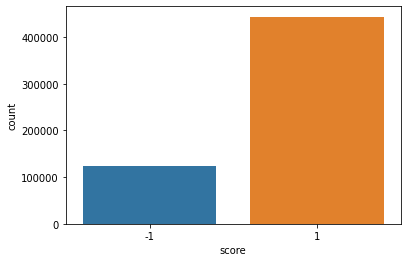

In [ ]:
sns.countplot(x="score",data=df)

$\fbox{${\color{navy}{\large{Identifying {\space}the {\space}Target {\space}Variable {\space}and{\space} Splitting {\space}the {\space}Data {\space}into {\space}Train {\space}and {\space}Test {\space}{\space}}}}$}$

In [ ]:
x=df[["reviewsummary"]]
y=df["score"]

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
x_train.head()

,reviewsummary
251349,Not one of the good ones
523262,Wrong item displayed
224543,great concept; miserable construction
291632,OK but not the best
37385,Good Stuff


In [ ]:
x_train.shape

(454763, 1)

$\fbox{$\color{navy}{\large{Data {\space}Preprocessing(Data Cleaning + Data Transformation)  {\space}}}$}$

In [ ]:
import nltk #library for text processing
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
from nltk.tokenize import word_tokenize # for token cleaning
from nltk.corpus import stopwords # to remove stop words
from nltk.stem import PorterStemmer  # stemming for cleaning
from nltk.stem import WordNetLemmatizer # lemmitation for cleaning

In [ ]:
# Initialize the inbuilt stemmer
stemmer=PorterStemmer()

lemmatizer=WordNetLemmatizer()

In [ ]:
def preprocess(raw_text,flag):

  # Removing special character and digits
  sentence=re.sub("[^a-zA-Z]"," ",raw_text)

  # Change into lower case
  sentence=sentence.lower()

  c=sentence.split()

  clean=[ i for i in c if i!="br"]

  # tokenize into words
  tokens=[i  for i in clean if not i in stopwords.words("english")]

  # stemming / lemmatization
  if (flag=="stem"):
      tokens=[stemmer.stem(word)  for word in tokens]
  else:
      tokens=[lemmatizer.lemmatize(word) for word in tokens]

  return pd.Series([" ".join(tokens),len(tokens)])

In [ ]:
x_train.head()

,reviewsummary
251349,Not one of the good ones
523262,Wrong item displayed
224543,great concept; miserable construction
291632,OK but not the best
37385,Good Stuff


In [ ]:
! pip install tqdm 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from tqdm import tqdm,tqdm_notebook

In [ ]:
tqdm.pandas()

In [ ]:
temp_df=x_train["reviewsummary"].progress_apply(lambda x : preprocess(x,"stem"))


100%|██████████| 454763/454763 [08:22<00:00, 905.38it/s]


In [ ]:
temp_df.columns=["clean_text_stem","text_length_stem"]

In [ ]:
temp_df.head()

,clean_text_stem,text_length_stem
251349,one good one,3
523262,wrong item display,3
224543,great concept miser construct,4
291632,ok best,2
37385,good stuff,2


In [ ]:
x_train=pd.concat([x_train,temp_df],axis=1)

In [ ]:
x_train.head()

,reviewsummary,clean_text_stem,text_length_stem
251349,Not one of the good ones,one good one,3
523262,Wrong item displayed,wrong item display,3
224543,great concept; miserable construction,great concept miser construct,4
291632,OK but not the best,ok best,2
37385,Good Stuff,good stuff,2


In [ ]:
temp_df=x_train["reviewsummary"].progress_apply(lambda x : preprocess(x,"lemm"))

100%|██████████| 454763/454763 [07:55<00:00, 956.98it/s] 


In [ ]:
temp_df.head()

,0,1
251349,one good one,3
523262,wrong item displayed,3
224543,great concept miserable construction,4
291632,ok best,2
37385,good stuff,2


In [ ]:
temp_df.columns=["clean_text_lemma","text_length_lemma"]

In [ ]:
x_train=pd.concat([x_train,temp_df],axis=1)

In [ ]:
x_train.head()

,reviewsummary,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
251349,Not one of the good ones,one good one,3,one good one,3
523262,Wrong item displayed,wrong item display,3,wrong item displayed,3
224543,great concept; miserable construction,great concept miser construct,4,great concept miserable construction,4
291632,OK but not the best,ok best,2,ok best,2
37385,Good Stuff,good stuff,2,good stuff,2


$\fbox{$\color{navy}{\large{  Creating{\space}the  {\space}WordCloud  {\space} }}$}$

In [ ]:
from wordcloud import WordCloud

<h1 align = 'center' >Creating the word cloud for positive rating </h1>


In [ ]:
p=x_train.loc[y_train==1,:]
p.head()

,reviewsummary,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
37385,Good Stuff,good stuff,2,good stuff,2
151024,"So good, it's addictive",good addict,2,good addictive,2
347910,gluten free granola,gluten free granola,3,gluten free granola,3
361287,puck coffee,puck coffe,2,puck coffee,2
408062,Coffee,coffe,1,coffee,1


In [ ]:
words=" ".join(p["clean_text_lemma"])



In [ ]:
clean_positive_words= WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      max_font_size=70,
                      max_words=150,
                      width=700,
                      height=300
                     ).generate(words)

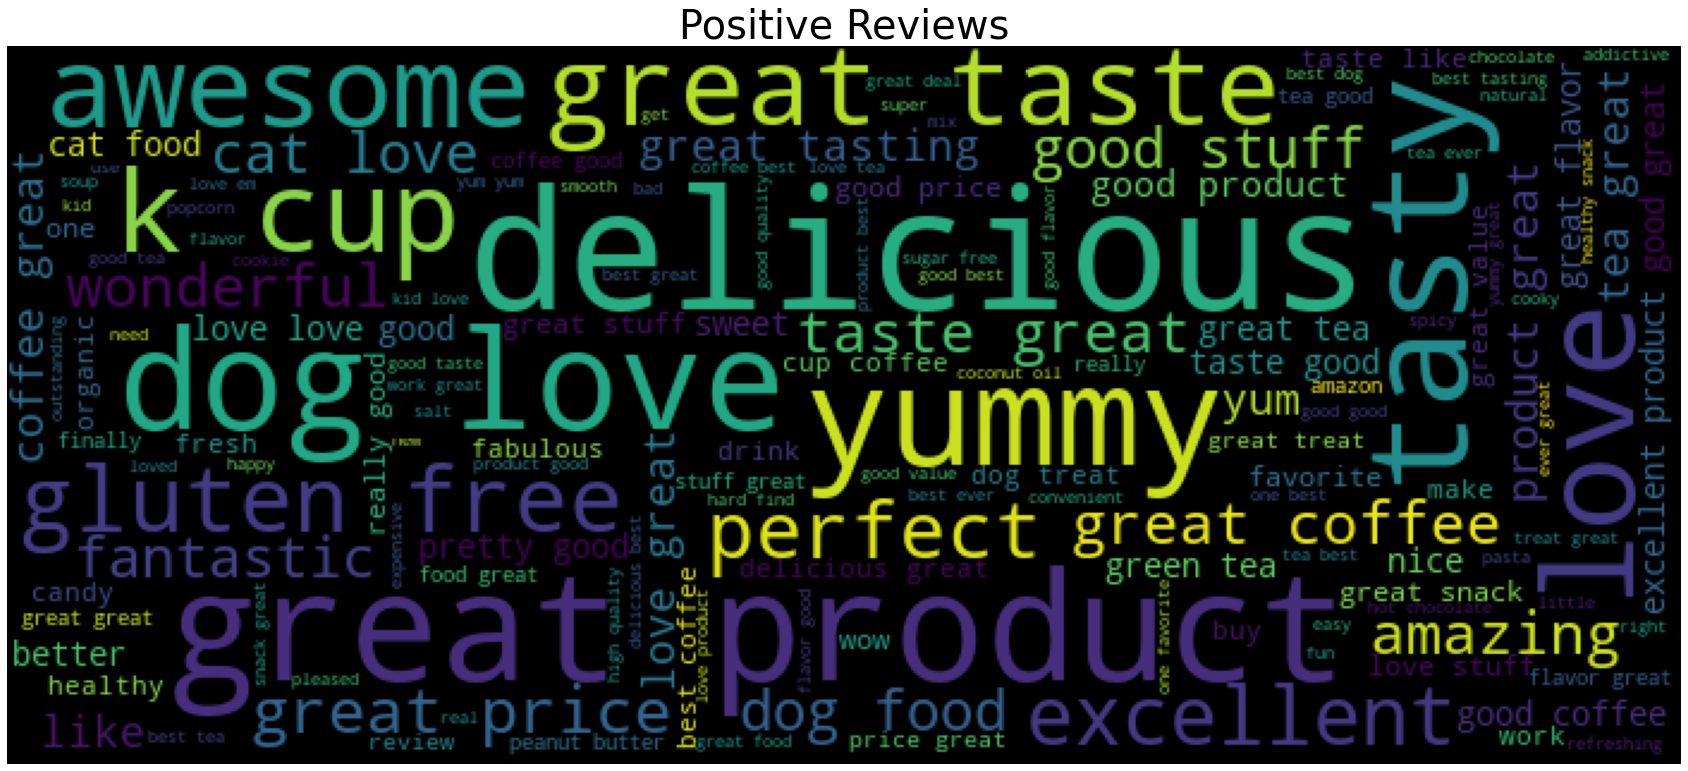

In [ ]:
plt.figure(1,figsize=(30,20))
plt.imshow(clean_positive_words)
plt.title("Positive Reviews",fontsize=40)
plt.axis('off')
plt.show()

<h1 align = 'center' >Creating the word cloud for Negative rating </h1>

In [ ]:
n=x_train.loc[y_train==-1,:]
n.head()

,reviewsummary,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
251349,Not one of the good ones,one good one,3,one good one,3
523262,Wrong item displayed,wrong item display,3,wrong item displayed,3
224543,great concept; miserable construction,great concept miser construct,4,great concept miserable construction,4
291632,OK but not the best,ok best,2,ok best,2
433324,"Good taste, terrible value",good tast terribl valu,4,good taste terrible value,4


In [ ]:
words=" ".join(n["clean_text_lemma"])


In [ ]:
clean_negative_words= WordCloud(stopwords=stopwords.words("english"),
                      background_color='black',
                      max_font_size=70,
                      max_words=150,
                      width=700,
                      height=300
                     ).generate(words)

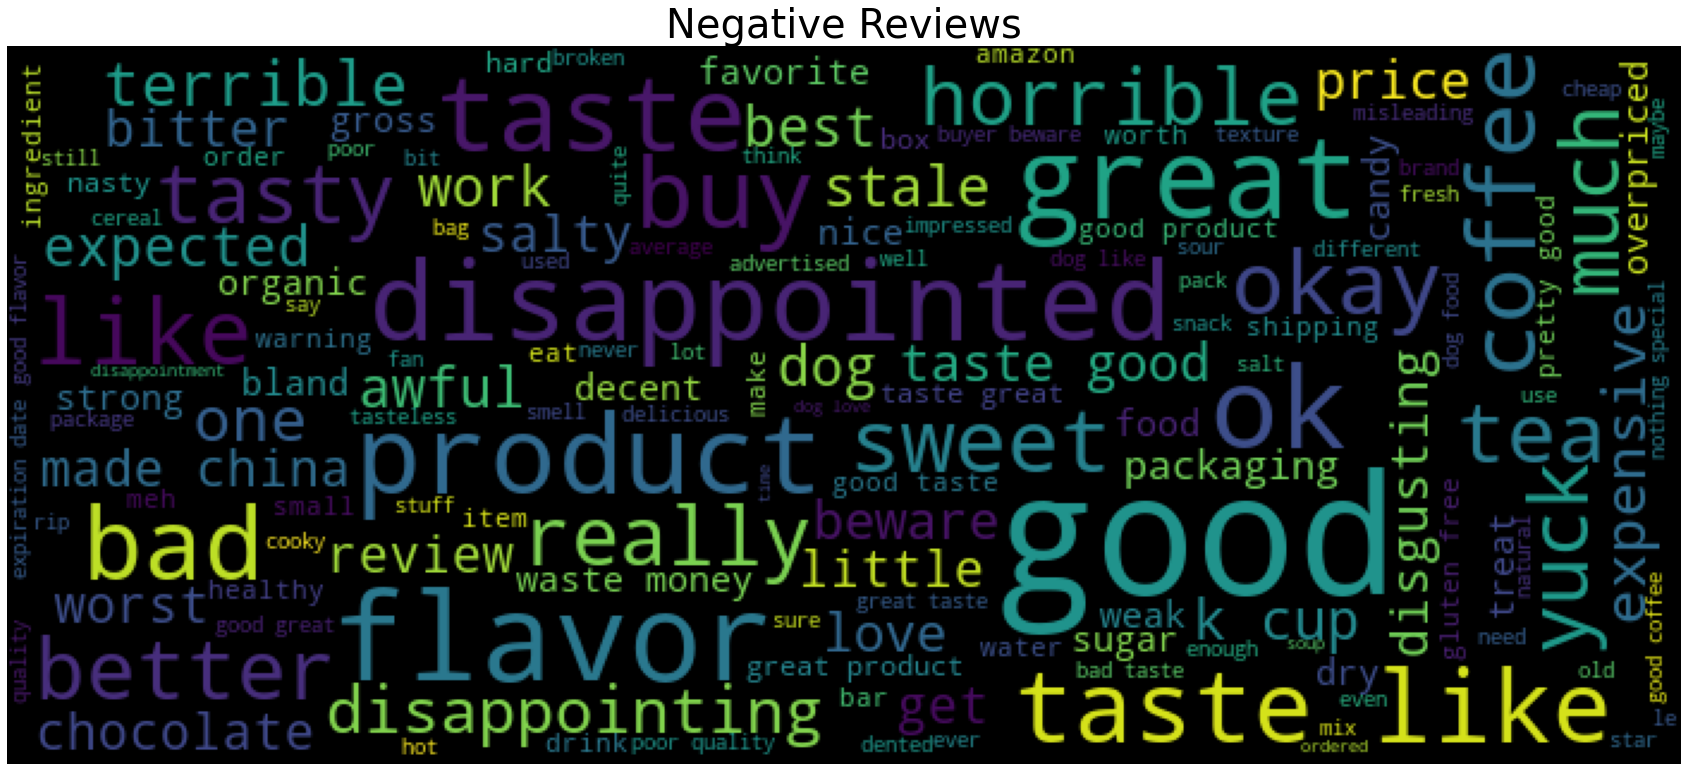

In [ ]:
plt.figure(1,figsize=(30,20))
plt.imshow(clean_negative_words)
plt.title("Negative Reviews",fontsize=40)
plt.axis('off')
plt.show()

*__Converting Text to Numerical Vectors-Bow Representation__*


* **step-1** :- Learn the vocabulary from the text data

* **step-2** :- Transform the train to x_train

* **Step-3** :- Transform the test to x_test


In [ ]:
x_train.head()

,reviewsummary,clean_text_stem,text_length_stem,clean_text_lemma,text_length_lemma
251349,Not one of the good ones,one good one,3,one good one,3
523262,Wrong item displayed,wrong item display,3,wrong item displayed,3
224543,great concept; miserable construction,great concept miser construct,4,great concept miserable construction,4
291632,OK but not the best,ok best,2,ok best,2
37385,Good Stuff,good stuff,2,good stuff,2


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
vocab=CountVectorizer()

x_train_bow= vocab.fit_transform(x_train["clean_text_lemma"])
x_train_bow

<454763x26986 sparse matrix of type '<class 'numpy.int64'>'
	with 1280801 stored elements in Compressed Sparse Row format>

In [ ]:
print("Total unique words:",len(vocab.vocabulary_))

print("Type of train features:", type(x_train_bow))

print("Shape of input data:",x_train_bow.shape)

Total unique words: 26986
Type of train features: <class 'scipy.sparse.csr.csr_matrix'>
Shape of input data: (454763, 26986)


$\fbox{$\color{navy}{\large{  Processing {\space}Text  {\space}Data  {\space} }}$}$

In [ ]:
x_test.head()

,reviewsummary
165256,manuka WHAT!!!
231465,The Most Wonderful Dark Roast Coffee
427827,Excellent travel food
433954,"Good product, good quality"
70260,"The ""dream food"" of small breed overweight do..."


In [ ]:
temp_df=x_test["reviewsummary"].progress_apply(lambda x: preprocess(x,"lemm"))



100%|██████████| 113691/113691 [01:56<00:00, 974.94it/s] 


In [ ]:
temp_df.columns=["clean_text_lemma","text_length_lemma"]

temp_df.head()

,clean_text_lemma,text_length_lemma
165256,manuka,1
231465,wonderful dark roast coffee,4
427827,excellent travel food,3
433954,good product good quality,4
70260,dream food small breed overweight dog,6


In [ ]:
x_test=pd.concat([x_test,temp_df],axis=1)

x_test.head()

,reviewsummary,clean_text_lemma,text_length_lemma
165256,manuka WHAT!!!,manuka,1
231465,The Most Wonderful Dark Roast Coffee,wonderful dark roast coffee,4
427827,Excellent travel food,excellent travel food,3
433954,"Good product, good quality",good product good quality,4
70260,"The ""dream food"" of small breed overweight do...",dream food small breed overweight dog,6


In [ ]:
temp_df=x_test["reviewsummary"].progress_apply(lambda x: preprocess(x,"stem"))


100%|██████████| 113691/113691 [02:33<00:00, 738.41it/s] 


In [ ]:
temp_df.columns=["clean_text_stem","text_length_stem"]

temp_df.head()

,clean_text_stem,text_length_stem
165256,manuka,1
231465,wonder dark roast coffe,4
427827,excel travel food,3
433954,good product good qualiti,4
70260,dream food small breed overweight dog,6


In [ ]:
x_test=pd.concat([x_test,temp_df],axis=1)

x_test.head()

,reviewsummary,clean_text_lemma,text_length_lemma,clean_text_stem,text_length_stem
165256,manuka WHAT!!!,manuka,1,manuka,1
231465,The Most Wonderful Dark Roast Coffee,wonderful dark roast coffee,4,wonder dark roast coffe,4
427827,Excellent travel food,excellent travel food,3,excel travel food,3
433954,"Good product, good quality",good product good quality,4,good product good qualiti,4
70260,"The ""dream food"" of small breed overweight do...",dream food small breed overweight dog,6,dream food small breed overweight dog,6


In [ ]:
x_test_bow=vocab.transform(x_test["clean_text_lemma"])
x_test_bow

<113691x26986 sparse matrix of type '<class 'numpy.int64'>'
	with 316673 stored elements in Compressed Sparse Row format>

$\fbox{$\color{navy}{\large{ Passing {\space} through {\space} Algorithms {\space} }}$}$



<h1 align = 'center' > $\color{gold}{\large{Logistic{\space} Regression}}$ </h1>

In [ ]:
import sklearn

In [ ]:
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(max_iter=454763)
classifier.fit(x_train_bow,y_train)

LogisticRegression(max_iter=454763)

In [ ]:
y_test_pred_lg=classifier.predict(x_test_bow)

<AxesSubplot:xlabel='score', ylabel='Count'>

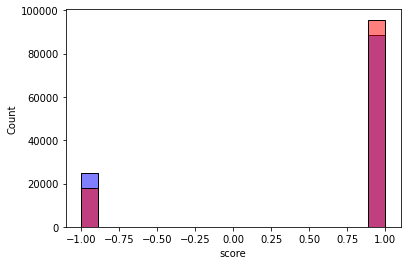

In [ ]:
sns.histplot(y_test,color="blue",alpha=0.5)
sns.histplot(y_test_pred_lg,color="red",alpha=0.5)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_test_pred_lg))


0.8725580740779834


<h1 align = 'center' > $\color{gold}{\large{Decision{\space} Tree}}$ </h1>

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(x_train_bow,y_train)

DecisionTreeClassifier()

In [ ]:
y_test_pred_dt=classifier.predict(x_test_bow)

<AxesSubplot:xlabel='score', ylabel='Count'>

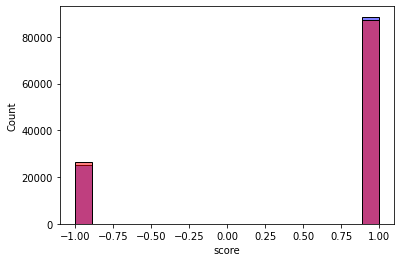

In [ ]:

sns.histplot(y_test,color="blue",alpha=0.5)
sns.histplot(y_test_pred_dt,color="red",alpha=0.5)

In [ ]:
print(accuracy_score(y_test,y_test_pred_dt))

0.883227344292864


<h1 align = 'center' > $\color{gold}{\large{Random{\space} Forest}}$ </h1>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
classifier=RandomForestClassifier()
classifier.fit(x_train_bow,y_train)

RandomForestClassifier()

In [ ]:
y_test_pred_rf=classifier.predict(x_test_bow)

<AxesSubplot:xlabel='score', ylabel='Count'>

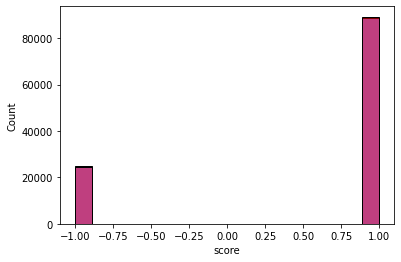

In [ ]:
sns.histplot(y_test,color="blue",alpha=0.5)
sns.histplot(y_test_pred_rf,color="red",alpha=0.5)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,y_test_pred_rf))

Accuracy_score: 0.8951632055307808


<h1 align = 'center' > $\color{gold}{\large{Naive{\space} Bayes}}$ </h1>

In [ ]:
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()
classifier.fit(x_train_bow,y_train)

MultinomialNB()

In [ ]:
y_test_pred_nb=classifier.predict(x_test_bow)

<AxesSubplot:xlabel='score', ylabel='Count'>

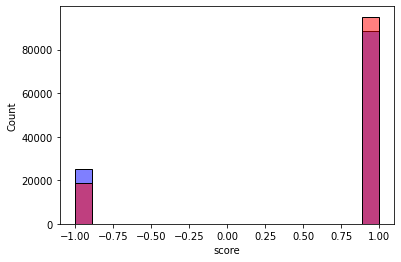

In [ ]:
sns.histplot(y_test,color="blue",alpha=0.5)
sns.histplot(y_test_pred_nb,color="red",alpha=0.5)

In [ ]:
print("Accuracy_score:",accuracy_score(y_test,y_test_pred_nb))

Accuracy_score: 0.8631202118021655


<h1 align = 'center' > $\color{gold}{\large{K-Nearest{\space} Neighbor}}$ </h1>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
classifier=KNeighborsClassifier()
classifier.fit(x_train_bow,y_train)

KNeighborsClassifier()

In [ ]:
y_test_pred_knn=classifier.predict(x_test_bow)

<AxesSubplot:xlabel='score', ylabel='Count'>

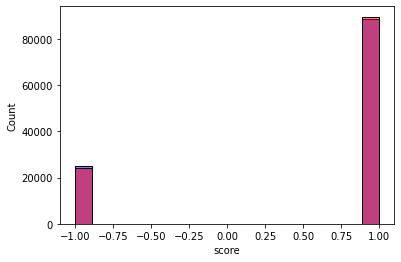

In [ ]:
sns.histplot(y_test,color="blue",alpha=0.5)
sns.histplot(y_test_pred_knn,color="red",alpha=0.5)

In [ ]:
from sklearn.metrics import accuracy_score
print("Accuracy_score:",accuracy_score(y_test,y_test_pred_knn))

Accuracy_score: 0.8709308564442216


<h1 align = 'center' > $\color{gold}{\large{Ada{\space} Booster}}$ </h1>

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
classifier=AdaBoostClassifier()
classifier.fit(x_train_bow,y_train)

AdaBoostClassifier()

In [ ]:
y_test_pred_adboost=classifier.predict(x_test_bow)

<AxesSubplot:xlabel='score', ylabel='Count'>

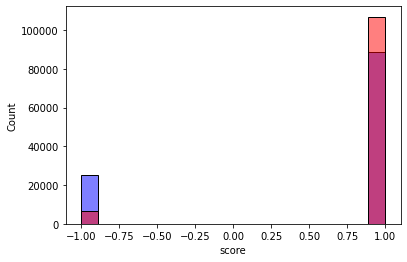

In [ ]:
sns.histplot(y_test,color="blue",alpha=0.5)
sns.histplot(y_test_pred_adboost,color="red",alpha=0.5)

In [ ]:
print("Accuracy_score:",accuracy_score(y_test,y_test_pred_adboost))

Accuracy_score: 0.8184201036141823


<h1 align = 'center' > $\color{gold}{\large{Gradient {\space} Boosting}}$ </h1>

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
classifier=GradientBoostingClassifier()
classifier.fit(x_train_bow,y_train)

GradientBoostingClassifier()

In [ ]:
y_test_pred_gradient=classifier.predict(x_test_bow)

<AxesSubplot:xlabel='score', ylabel='Count'>

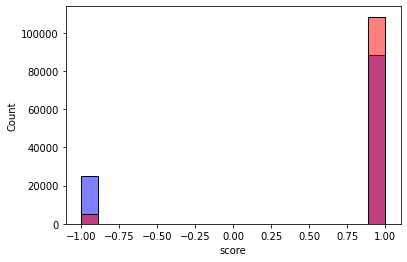

In [ ]:
sns.histplot(y_test,color="blue",alpha=0.5)
sns.histplot(y_test_pred_gradient,color="red",alpha=0.5)

In [ ]:
print("Accuracy_score:",accuracy_score(y_test,y_test_pred_gradient))

Accuracy_score: 0.8157901680871836


# <h1 style='text-align: center; color: magenta'><u>$\huge{CONCLUSION}$<u></h1>

In [18]:
result  = pd.DataFrame({  'Algorithm' : ['Logistic Regression' , 'Decision Tree' ,'Naive Bayes' ,'Random Forest' , 'K-Nearest Neighbors','AdaBooster',
                                         'Gradient Boosting'] ,
                        
                        'Accuracy' : [87.256 , 88.322,86.312,89.516,87.093,81.843,81.580]})
result.sort_values('Accuracy' , ascending = False)

,Algorithm,Accuracy
3,Random Forest,89.516
1,Decision Tree,88.322
0,Logistic Regression,87.256
4,K-Nearest Neighbors,87.093
2,Naive Bayes,86.312
5,AdaBooster,81.843
6,Gradient Boosting,81.580


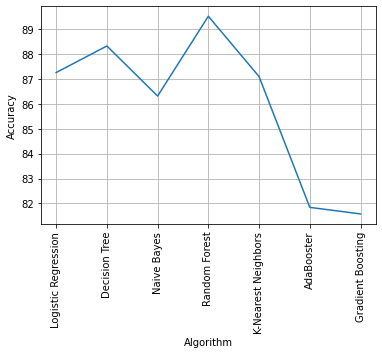

In [34]:
sns.lineplot(x = result['Algorithm'] , y= result['Accuracy'] )
plt.xticks(rotation = 90)
plt.grid();

# $\color{GREEN}{\underline{Random {\space} Forest }}$ gives the best Accuracy_score.